In [1]:
import sys
import numpy
import pandas
import xgboost
import lightgbm
import sklearn

print('python :', sys.version)
print('numpy :', numpy.__version__)
print('pandas :', pandas.__version__)
print('scikit-learn :', sklearn.__version__)
print('lightgbm :', lightgbm.__version__)
print('xgboost :', xgboost.__version__)

python : 3.9.16 | packaged by conda-forge | (main, Feb  1 2023, 21:38:11) 
[Clang 14.0.6 ]
numpy : 1.26.4
pandas : 2.2.3
scikit-learn : 1.0.2
lightgbm : 3.3.5
xgboost : 1.6.1


# 📍📍 train + test

In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv('/Users/pycode/project/데이터/train.csv')
train.info()
train.head()
# train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2452 non-null   object 
 1   매물확인방식  2452 non-null   object 
 2   보증금     2452 non-null   float64
 3   월세      2452 non-null   int64  
 4   전용면적    1665 non-null   float64
 5   해당층     2223 non-null   float64
 6   총층      2436 non-null   float64
 7   방향      2452 non-null   object 
 8   방수      2436 non-null   float64
 9   욕실수     2434 non-null   float64
 10  주차가능여부  2452 non-null   object 
 11  총주차대수   1756 non-null   float64
 12  관리비     2452 non-null   int64  
 13  중개사무소   2452 non-null   object 
 14  제공플랫폼   2452 non-null   object 
 15  게재일     2452 non-null   object 
 16  허위매물여부  2452 non-null   int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 325.8+ KB


,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1


In [3]:

test = pd.read_csv('/Users/pycode/project/데이터/test.csv')
test.info()
test.head()
test.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      613 non-null    object 
 1   매물확인방식  613 non-null    object 
 2   보증금     613 non-null    float64
 3   월세      613 non-null    int64  
 4   전용면적    429 non-null    float64
 5   해당층     563 non-null    float64
 6   총층      611 non-null    float64
 7   방향      613 non-null    object 
 8   방수      611 non-null    float64
 9   욕실수     611 non-null    float64
 10  주차가능여부  613 non-null    object 
 11  총주차대수   438 non-null    float64
 12  관리비     613 non-null    int64  
 13  중개사무소   613 non-null    object 
 14  제공플랫폼   613 non-null    object 
 15  게재일     613 non-null    object 
dtypes: float64(7), int64(2), object(7)
memory usage: 76.8+ KB


ID          0
매물확인방식      0
보증금         0
월세          0
전용면적      184
해당층        50
총층          2
방향          0
방수          2
욕실수         2
주차가능여부      0
총주차대수     175
관리비         0
중개사무소       0
제공플랫폼       0
게재일         0
dtype: int64

## 📍 데이터 타입 지정
* train, test 합치기 전에 데이터 타입 지정   
train -> 데이터타입 : 'train'    
test -> 데이터타입 : 'test' 
* concat으로 train + test

In [4]:
train['데이터타입'] = 'train'
test['데이터타입'] = 'test'
total_data = pd.concat([train.drop(columns='허위매물여부'), test])

total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3065 entries, 0 to 612
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      3065 non-null   object 
 1   매물확인방식  3065 non-null   object 
 2   보증금     3065 non-null   float64
 3   월세      3065 non-null   int64  
 4   전용면적    2094 non-null   float64
 5   해당층     2786 non-null   float64
 6   총층      3047 non-null   float64
 7   방향      3065 non-null   object 
 8   방수      3047 non-null   float64
 9   욕실수     3045 non-null   float64
 10  주차가능여부  3065 non-null   object 
 11  총주차대수   2194 non-null   float64
 12  관리비     3065 non-null   int64  
 13  중개사무소   3065 non-null   object 
 14  제공플랫폼   3065 non-null   object 
 15  게재일     3065 non-null   object 
 16  데이터타입   3065 non-null   object 
dtypes: float64(7), int64(2), object(8)
memory usage: 431.0+ KB


## 📍 train + test 후 파생변수 생성
* 미기재
* 방치일수
* 집세

In [5]:
import datetime

# 미기재
total_data['미기재'] = total_data.isna().sum(axis=1)

# 방치일수
last = datetime.datetime.strptime(total_data['게재일'].max(), "%Y-%m-%d").date()
today = last + datetime.timedelta(days=1)

def get_delta_day(date):
    delta = today - datetime.datetime.strptime(date, "%Y-%m-%d").date()
    return delta.days

total_data['방치일수'] = total_data['게재일'].apply(lambda x: get_delta_day(x))

# 집세
total_data['집세'] = total_data['관리비'] * 10000 + total_data['월세']

total_data.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,데이터타입,미기재,방치일수,집세
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,train,2,146,1430000
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,train,2,68,200000
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,train,2,96,380000
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,train,0,98,130000
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,train,2,252,530000


## 📍 train + test 후 결측치 처리

### 1. 방수, 욕실수   
  -> 가장 많은 수인 1로 채움

In [6]:
room = total_data['방수'].value_counts()
bath = total_data['욕실수'].value_counts()
print(room)
print(bath)

total_data[['방수', '욕실수']] = total_data[['방수', '욕실수']].fillna(1.0)

방수
1.0    1881
2.0    1166
Name: count, dtype: int64
욕실수
1.0    2940
2.0     105
Name: count, dtype: int64


### 2. 전용면적   
  -> 방수, 욕실수 조합으로 전용면적 평균 및 적용

In [7]:
dropna_total = total_data.dropna(subset=['전용면적'], how='any', axis=0)
new_data = pd.DataFrame(dropna_total, columns=('방수', '욕실수', '전용면적'))

mean_data = new_data.groupby(['방수', '욕실수'], as_index=False).mean()
print(mean_data)

for index, row in total_data.iterrows():
    if (pd.isna(row['전용면적'])):
        filterTrain = mean_data[(mean_data['방수'] == row['방수']) & (mean_data['욕실수'] == row['욕실수'])]
        total_data.at[index, '전용면적'] = filterTrain['전용면적'].values[0]

total_data.head()

    방수  욕실수       전용면적
0  1.0  1.0  25.160408
1  2.0  1.0  32.201518
2  2.0  2.0  26.756931


,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,데이터타입,미기재,방치일수,집세
0,TRAIN_0000,현장확인,402500000.0,470000,25.160408,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,train,2,146,1430000
1,TRAIN_0001,현장확인,170500000.0,200000,32.201518,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,train,2,68,200000
2,TRAIN_0002,전화확인,114000000.0,380000,25.160408,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,train,2,96,380000
3,TRAIN_0003,현장확인,163500000.0,30000,36.300000,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,train,0,98,130000
4,TRAIN_0004,현장확인,346000000.0,530000,32.201518,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,train,2,252,530000


### 3. 해당층, 총층   
  -> 평균을 반올림하여 적용

In [8]:
room = round(total_data['해당층'].mean())
bath = round(total_data['총층'].mean())
print(room)
print(bath)
total_data['해당층'] = total_data['해당층'].fillna(room)
total_data['총층'] = total_data['총층'].fillna(bath)

total_data.isna().sum()

5
8


ID          0
매물확인방식      0
보증금         0
월세          0
전용면적        0
해당층         0
총층          0
방향          0
방수          0
욕실수         0
주차가능여부      0
총주차대수     871
관리비         0
중개사무소       0
제공플랫폼       0
게재일         0
데이터타입       0
미기재         0
방치일수        0
집세          0
dtype: int64

### 4. 총주차대수
-> 평균을 반올림하여 적용

In [9]:
parking = round(total_data['총주차대수'].mean())
total_data['총주차대수'] = total_data['총주차대수'].fillna(parking)

## 📍 보증금, 월세, 관리비 단위 정리

In [10]:
total_data['보증금'] = total_data['보증금'] / 10000
total_data['월세'] = total_data['월세'] / 10000
total_data['집세'] = total_data['집세'] / 10000
# total_data['관리비'] = total_data['관리비'] * 10000
total_data.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,데이터타입,미기재,방치일수,집세
0,TRAIN_0000,현장확인,40250.0,47.0,25.160408,5.0,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,train,2,146,143.0
1,TRAIN_0001,현장확인,17050.0,20.0,32.201518,3.0,4.0,남동향,2.0,1.0,불가능,20.0,0,q39iV5J4E6,D플랫폼,2024-12-26,train,2,68,20.0
2,TRAIN_0002,전화확인,11400.0,38.0,25.160408,2.0,3.0,동향,1.0,1.0,불가능,20.0,0,b03oE4G3F6,A플랫폼,2024-11-28,train,2,96,38.0
3,TRAIN_0003,현장확인,16350.0,3.0,36.300000,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,train,0,98,13.0
4,TRAIN_0004,현장확인,34600.0,53.0,32.201518,3.0,3.0,동향,2.0,1.0,불가능,20.0,0,N45gM0M7R0,B플랫폼,2024-06-25,train,2,252,53.0


---------------

# 📍📍 Feature Scaling
-> MinMaxScaler 사용

In [11]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
cols_for_scale = ['보증금', '월세', '전용면적', '해당층', '총층', '방수', '욕실수', '총주차대수', '관리비', '미기재', '방치일수', '집세']
scaler.fit(total_data[cols_for_scale])
total_data[cols_for_scale] = scaler.transform(total_data[cols_for_scale])

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
total_data_scaled = pd.DataFrame(data=total_data, columns=total_data.columns)
print('feature들의 최솟값')
print(total_data_scaled.min())
print('\nfeature들의 최댓값')
print(total_data_scaled.max())
total_data_scaled.head()

feature들의 최솟값
ID          TEST_000
매물확인방식          서류확인
보증금              0.0
월세               0.0
전용면적             0.0
해당층              0.0
총층               0.0
방향               남동향
방수               0.0
욕실수              0.0
주차가능여부            가능
총주차대수            0.0
관리비              0.0
중개사무소     A06Nz2Z1R1
제공플랫폼           A플랫폼
게재일       2023-04-28
데이터타입           test
미기재              0.0
방치일수             0.0
집세               0.0
dtype: object

feature들의 최댓값
ID        TRAIN_2451
매물확인방식          현장확인
보증금              1.0
월세               1.0
전용면적             1.0
해당층              1.0
총층               1.0
방향                서향
방수               1.0
욕실수              1.0
주차가능여부           불가능
총주차대수            1.0
관리비              1.0
중개사무소     z81HE4G4N5
제공플랫폼           N플랫폼
게재일       2025-03-03
데이터타입          train
미기재              1.0
방치일수             1.0
집세               1.0
dtype: object


,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,데이터타입,미기재,방치일수,집세
0,TRAIN_0000,현장확인,0.874587,0.626667,0.235923,0.20,0.684211,서향,0.0,0.0,가능,0.066214,1.000000,t93Nt6I2I0,B플랫폼,2024-10-09,train,0.333333,0.214815,1.000000
1,TRAIN_0001,현장확인,0.364136,0.266667,0.452772,0.10,0.105263,남동향,1.0,0.0,불가능,0.032258,0.000000,q39iV5J4E6,D플랫폼,2024-12-26,train,0.333333,0.099259,0.139860
2,TRAIN_0002,전화확인,0.239824,0.506667,0.235923,0.05,0.052632,동향,0.0,0.0,불가능,0.032258,0.000000,b03oE4G3F6,A플랫폼,2024-11-28,train,0.333333,0.140741,0.265734
3,TRAIN_0003,현장확인,0.348735,0.040000,0.578996,0.10,0.368421,남동향,1.0,0.0,가능,0.020374,0.104167,G52Iz8V2B9,A플랫폼,2024-11-26,train,0.000000,0.143704,0.090909
4,TRAIN_0004,현장확인,0.750275,0.706667,0.452772,0.10,0.052632,동향,1.0,0.0,불가능,0.032258,0.000000,N45gM0M7R0,B플랫폼,2024-06-25,train,0.333333,0.371852,0.370629


# 📍📍 train, test 데이터 분리

In [12]:
total_data_prepro = total_data_scaled
train_data = total_data_prepro[total_data_prepro['데이터타입'] == 'train']
test_data = total_data_prepro[total_data_prepro['데이터타입'] == 'test']
# print(train_data.head())
# print("-" * 10)
# print(test_data.head())

# def set_false(data) :
#     tttt = train[train['ID'] == data]
#     return tttt['허위매물여부'].values[0]

# train_data["허위매물여부"] = train_data["ID"].apply(lambda x : set_false(x))

train_data["허위매물여부"] = train.set_index("ID").loc[train_data["ID"], "허위매물여부"].values

# train_data = train_data.drop(columns=['게재일', '데이터타입'])
# test_data = test_data.drop(columns=['게재일', '데이터타입'])
train_data_mo = train_data.drop(columns=['ID', '게재일', '데이터타입'])
test_data_mo = test_data.drop(columns=['ID', '게재일', '데이터타입'])
print(train_data_mo.head())
print(test_data_mo.head())

# train_data, test_data 파일로 저장
# modified_train_data = train_data.drop(columns='데이터타입')
# modified_test_data = test_data.drop(columns='데이터타입')
# modified_train_data.to_csv("/Users/pycode/project/데이터/modified_train.csv", index = False)
# modified_test_data.to_csv("/Users/pycode/project/데이터/modified_test.csv", index = False)

  매물확인방식       보증금        월세      전용면적   해당층        총층   방향   방수  욕실수 주차가능여부  \
0   현장확인  0.874587  0.626667  0.235923  0.20  0.684211   서향  0.0  0.0     가능   
1   현장확인  0.364136  0.266667  0.452772  0.10  0.105263  남동향  1.0  0.0    불가능   
2   전화확인  0.239824  0.506667  0.235923  0.05  0.052632   동향  0.0  0.0    불가능   
3   현장확인  0.348735  0.040000  0.578996  0.10  0.368421  남동향  1.0  0.0     가능   
4   현장확인  0.750275  0.706667  0.452772  0.10  0.052632   동향  1.0  0.0    불가능   

      총주차대수       관리비       중개사무소 제공플랫폼       미기재      방치일수        집세  허위매물여부  
0  0.066214  1.000000  t93Nt6I2I0  B플랫폼  0.333333  0.214815  1.000000       0  
1  0.032258  0.000000  q39iV5J4E6  D플랫폼  0.333333  0.099259  0.139860       0  
2  0.032258  0.000000  b03oE4G3F6  A플랫폼  0.333333  0.140741  0.265734       0  
3  0.020374  0.104167  G52Iz8V2B9  A플랫폼  0.000000  0.143704  0.090909       0  
4  0.032258  0.000000  N45gM0M7R0  B플랫폼  0.333333  0.371852  0.370629       1  
  매물확인방식       보증금        월세      전용면적 

/var/folders/vf/7_3tcw7s7l1cqg5rdfjpnwf00000gn/T/ipykernel_20814/127868105.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["허위매물여부"] = train.set_index("ID").loc[train_data["ID"], "허위매물여부"].values


# 📍📍 SMOTENC 오버샘플링

In [13]:
from collections import Counter
from numpy.random import RandomState
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTENC
# train_data_mo
# X, y = make_classification(
#     n_classes=2, class_sep=2,
#     weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
#     n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10
# )
X_train = train_data_mo.iloc[:, :-1]
y_train = train_data_mo.iloc[:, -1]

# print(X_train.columns)
# categorical = [idx for idx, dtype in enumerate(X_train.dtypes) if dtype == 'int64']
cat_col_name = [0, 6, 9, 12, 13]
# cat_col_name = ['매물확인방식', '방향', '주차가능여부', '중개사무소', '제공플랫폼'],

print(f'Original dataset shape {X_train.shape}')
print(f'Original dataset samples per class {Counter(y_train)}')

# simulate the 2 last columns to be categorical features
# X_train[:, -2:] = RandomState(10).randint(0, 4, size=(1000, 2))
sm = SMOTENC(random_state=42, categorical_features=cat_col_name, k_neighbors=5)
X_res, y_res = sm.fit_resample(X_train, y_train)
print(f'Resampled dataset samples per class {Counter(y_res)}')

Original dataset shape (2452, 17)
Original dataset samples per class Counter({0: 2154, 1: 298})
Resampled dataset samples per class Counter({0: 2154, 1: 2154})


# 📍📍 X_res + test

In [14]:
X_res['데이터타입'] = 'train'
test_data_mo['데이터타입'] = 'test'
total_data = pd.concat([X_res, test_data_mo])

# X_res.info()
# test_data_mo.info()
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4921 entries, 0 to 612
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   매물확인방식  4921 non-null   object 
 1   보증금     4921 non-null   float64
 2   월세      4921 non-null   float64
 3   전용면적    4921 non-null   float64
 4   해당층     4921 non-null   float64
 5   총층      4921 non-null   float64
 6   방향      4921 non-null   object 
 7   방수      4921 non-null   float64
 8   욕실수     4921 non-null   float64
 9   주차가능여부  4921 non-null   object 
 10  총주차대수   4921 non-null   float64
 11  관리비     4921 non-null   float64
 12  중개사무소   4921 non-null   object 
 13  제공플랫폼   4921 non-null   object 
 14  미기재     4921 non-null   float64
 15  방치일수    4921 non-null   float64
 16  집세      4921 non-null   float64
 17  데이터타입   4921 non-null   object 
dtypes: float64(12), object(6)
memory usage: 730.5+ KB


# 📍📍 Encoding
-> 레이블 인코딩 (Label encoding) 사용

In [15]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['매물확인방식', '방향', '주차가능여부', '중개사무소', '제공플랫폼']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

total_data_encoded = encode_features(total_data)
total_data_encoded.head()

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,미기재,방치일수,집세,데이터타입
0,2,0.874587,0.626667,0.235923,0.20,0.684211,7,0.0,0.0,0,0.066214,1.000000,256,1,0.333333,0.214815,1.000000,train
1,2,0.364136,0.266667,0.452772,0.10,0.105263,0,1.0,0.0,1,0.032258,0.000000,240,3,0.333333,0.099259,0.139860,train
2,1,0.239824,0.506667,0.235923,0.05,0.052632,3,0.0,0.0,1,0.032258,0.000000,157,0,0.333333,0.140741,0.265734,train
3,2,0.348735,0.040000,0.578996,0.10,0.368421,0,1.0,0.0,0,0.020374,0.104167,32,0,0.000000,0.143704,0.090909,train
4,2,0.750275,0.706667,0.452772,0.10,0.052632,3,1.0,0.0,1,0.032258,0.000000,76,1,0.333333,0.371852,0.370629,train


# 📍📍 test, train 다시 분리 

In [16]:
total_data_prepro = total_data_encoded
train_data = total_data_prepro[total_data_prepro['데이터타입'] == 'train']
test_data = total_data_prepro[total_data_prepro['데이터타입'] == 'test']

# train_data["허위매물여부"] = train.set_index("ID").loc[train_data["ID"], "허위매물여부"].values

train_data_mo = pd.concat([train_data.drop(columns=['데이터타입']), y_res], axis=1)
# df = pd.concat([pd.Series(test_data['ID'], name="ID"), pd.DataFrame(ws50_preds, columns=["허위매물여부"])], axis=1)

# train_data_mo = train_data.drop(columns=['데이터타입'])
test_data_mo = test_data.drop(columns=['데이터타입'])
print(train_data_mo.head())
print(test_data_mo.head())

   매물확인방식       보증금        월세      전용면적   해당층        총층  방향   방수  욕실수  주차가능여부  \
0       2  0.874587  0.626667  0.235923  0.20  0.684211   7  0.0  0.0       0   
1       2  0.364136  0.266667  0.452772  0.10  0.105263   0  1.0  0.0       1   
2       1  0.239824  0.506667  0.235923  0.05  0.052632   3  0.0  0.0       1   
3       2  0.348735  0.040000  0.578996  0.10  0.368421   0  1.0  0.0       0   
4       2  0.750275  0.706667  0.452772  0.10  0.052632   3  1.0  0.0       1   

      총주차대수       관리비  중개사무소  제공플랫폼       미기재      방치일수        집세  허위매물여부  
0  0.066214  1.000000    256      1  0.333333  0.214815  1.000000       0  
1  0.032258  0.000000    240      3  0.333333  0.099259  0.139860       0  
2  0.032258  0.000000    157      0  0.333333  0.140741  0.265734       0  
3  0.020374  0.104167     32      0  0.000000  0.143704  0.090909       0  
4  0.032258  0.000000     76      1  0.333333  0.371852  0.370629       1  
   매물확인방식       보증금        월세      전용면적   해당층        총층  

-----------------

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def get_roc_curve(model, X_test, y_test):
    # 예측 확률 계산
    y_scores = model.predict_proba(X_test)[:, 1]

    # ROC 곡선 계산
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)

    # AUC 계산
    roc_auc = auc(fpr, tpr)

    # ROC 곡선 그리기
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, label='STR')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# 📍📍 XGBoost

In [32]:
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

from matplotlib import rc
rc('font', family='AppleGothic')

In [18]:
import xgboost as xgb

X_train = train_data_mo.iloc[:, :-1]
y_train = train_data_mo.iloc[:, -1]
X_test = test_data_mo.iloc[:, :]

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_tr.shape , X_val.shape)

(3877, 17) (431, 17)


## 📍 사이킷런 래퍼

### GridSearchCV 사용 O

In [35]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()
# xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)

xgb_param_grid = {'n_estimators':[200, 300, 400, 500], 'learning_rate':[0.02, 0.05, 0.07, 0.1, 0.15], 'max_depth': [3, 4, 5]}

# 1
xgb_grid = GridSearchCV(xgb, param_grid = xgb_param_grid, n_jobs=-1, verbose = 1)
# 2
# xgb_grid = GridSearchCV(xgb, param_grid=xgb_param_grid, n_jobs=-1, cv=3)
# 3
# xgb_grid = GridSearchCV(xgb, param_grid=xgb_param_grid, cv=3, scoring="f1_macro", n_jobs=-1)
# xgb_grid = GridSearchCV(xgb, param_grid=xgb_param_grid, scoring="f1_macro", n_jobs=-1)

evals = [(X_tr, y_tr), (X_val, y_val)]
fit_params = {'eval_set': evals}
xgb_grid.fit(X_tr, y_tr)


print("best f1_macro : {0: .4f}".format(xgb_grid.best_score_))
print("best param : ",xgb_grid.best_params_)

# dataframe으로 랭킹순보기
result_df = pd.DataFrame(xgb_grid.cv_results_)
result_df.sort_values(by=['rank_test_score'],inplace=True)
result_df[['params','mean_test_score','rank_test_score']].head(10)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


best f1_macro :  0.9770
best param :  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}


,params,mean_test_score,rank_test_score
43,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.977042,1
55,"{'learning_rate': 0.15, 'max_depth': 4, 'n_est...",0.976785,2
31,"{'learning_rate': 0.07, 'max_depth': 4, 'n_est...",0.976526,3
54,"{'learning_rate': 0.15, 'max_depth': 4, 'n_est...",0.976268,4
29,"{'learning_rate': 0.07, 'max_depth': 4, 'n_est...",0.976268,5
41,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.976268,6
19,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est...",0.976010,7
30,"{'learning_rate': 0.07, 'max_depth': 4, 'n_est...",0.976010,8
46,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.975753,9
42,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.975752,10


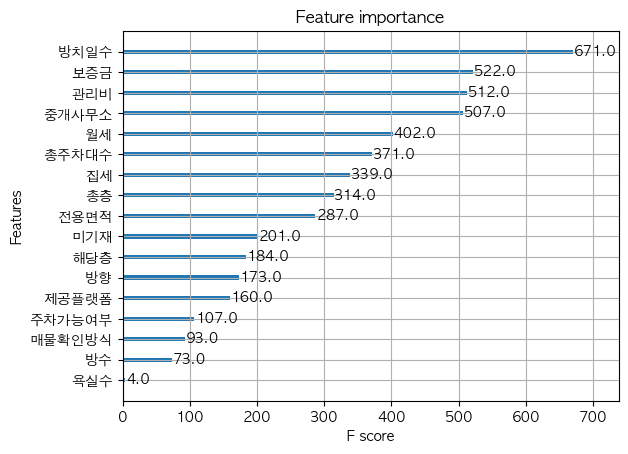

In [20]:
plot_importance(xgb_grid.best_estimator_)
plt.show()

In [ ]:
grid_preds = xgb_grid.predict(X_test)
grid_preds_proba = xgb_grid.predict_proba(X_test)[:, 1]

len(grid_preds)

df = pd.concat([pd.Series(test['ID'], name="ID"), pd.DataFrame(grid_preds, columns=["허위매물여부"])], axis=1)
print(df)

# df.to_csv("/Users/pycode/project/output_smote_xgboost_gridsearchcv.csv", index = False)

           ID  허위매물여부
0    TEST_000       0
1    TEST_001       0
2    TEST_002       1
3    TEST_003       0
4    TEST_004       0
..        ...     ...
608  TEST_608       0
609  TEST_609       0
610  TEST_610       0
611  TEST_611       0
612  TEST_612       0

[613 rows x 2 columns]


### GridSearchCV 사용 X

In [21]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, early_stopping_rounds=50, eval_metric='logloss')
# {'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 400}
# xgb_wrapper = XGBClassifier(n_estimators=500, learning_rate=0.02, max_depth=5, early_stopping_rounds=50, eval_metric='logloss')
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, eval_set=evals)

[0]	validation_0-logloss:0.65556	validation_1-logloss:0.65570
[1]	validation_0-logloss:0.62155	validation_1-logloss:0.62177
[2]	validation_0-logloss:0.59064	validation_1-logloss:0.59090
[3]	validation_0-logloss:0.56244	validation_1-logloss:0.56291
[4]	validation_0-logloss:0.53666	validation_1-logloss:0.53710
[5]	validation_0-logloss:0.51300	validation_1-logloss:0.51357
[6]	validation_0-logloss:0.49125	validation_1-logloss:0.49172
[7]	validation_0-logloss:0.47121	validation_1-logloss:0.47159
[8]	validation_0-logloss:0.45272	validation_1-logloss:0.45271


[9]	validation_0-logloss:0.43528	validation_1-logloss:0.43522
[10]	validation_0-logloss:0.41942	validation_1-logloss:0.41935
[11]	validation_0-logloss:0.40440	validation_1-logloss:0.40426
[12]	validation_0-logloss:0.39070	validation_1-logloss:0.39039
[13]	validation_0-logloss:0.37768	validation_1-logloss:0.37685
[14]	validation_0-logloss:0.36581	validation_1-logloss:0.36482
[15]	validation_0-logloss:0.35473	validation_1-logloss:0.35365
[16]	validation_0-logloss:0.34409	validation_1-logloss:0.34295
[17]	validation_0-logloss:0.33410	validation_1-logloss:0.33251
[18]	validation_0-logloss:0.32467	validation_1-logloss:0.32297
[19]	validation_0-logloss:0.31598	validation_1-logloss:0.31438
[20]	validation_0-logloss:0.30772	validation_1-logloss:0.30603
[21]	validation_0-logloss:0.30020	validation_1-logloss:0.29846
[22]	validation_0-logloss:0.29287	validation_1-logloss:0.29101
[23]	validation_0-logloss:0.28601	validation_1-logloss:0.28404
[24]	validation_0-logloss:0.27958	validation_1-logloss:0

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=50, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=3, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, ...)

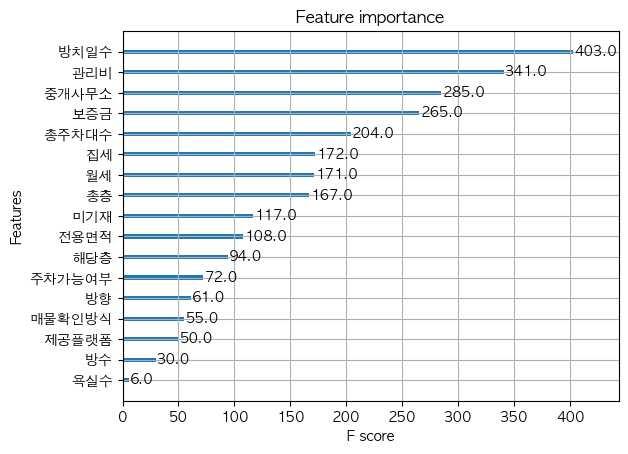

In [22]:
# fig, ax = plt.subplots(figsize=(10, 12))

# plot_importance(xgb_wrapper, ax=ax)
plot_importance(xgb_wrapper)
plt.show()

In [23]:


ws50_preds = xgb_wrapper.predict(X_test)
ws50_preds_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

len(ws50_preds)
test_data['ID']

df = pd.concat([pd.Series(test_data['ID'], name="ID"), pd.DataFrame(ws50_preds, columns=["허위매물여부"])], axis=1)
print(df)

# df.to_csv("/Users/pycode/project/output.csv", index = False)

KeyError: 'ID'

# 📍📍 LightGBM

### GridSearchCV 사용 O

In [36]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier


lgbm = LGBMClassifier()
# lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05, early_stopping_rounds=50)

# n_estimators=400, learning_rate=0.05, early_stopping_rounds=50
lgbm_param_grid = {'n_estimators':[200, 300, 400, 500], 'learning_rate':[0.02, 0.05, 0.07, 0.1, 0.15], 'max_depth': [3, 4, 5]}

# 1
lgbm_grid = GridSearchCV(lgbm, param_grid = lgbm_param_grid, n_jobs=-1, verbose = 1)
# 2
# lgbm_grid = GridSearchCV(lgbm, param_grid=lgbm_param_grid, n_jobs=-1, cv=3)
# 3
# lgbm_grid = GridSearchCV(lgbm, param_grid=lgbm_param_grid, cv=3, scoring="f1_macro", n_jobs=-1)
# lgbm_grid = GridSearchCV(lgbm, param_grid=lgbm_param_grid, scoring="f1_macro", n_jobs=-1)

evals = [(X_tr, y_tr), (X_val, y_val)]
fit_params = {'eval_set': evals}
lgbm_grid.fit(X_tr, y_tr)


print("best f1_macro : {0: .4f}".format(lgbm_grid.best_score_))
print("best param : ",lgbm_grid.best_params_)

# dataframe으로 랭킹순보기
result_df = pd.DataFrame(lgbm_grid.cv_results_)
result_df.sort_values(by=['rank_test_score'],inplace=True)
result_df[['params','mean_test_score','rank_test_score']].head(10)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


best f1_macro :  0.9788
best param :  {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 500}


,params,mean_test_score,rank_test_score
55,"{'learning_rate': 0.15, 'max_depth': 4, 'n_est...",0.978848,1
47,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.978333,2
53,"{'learning_rate': 0.15, 'max_depth': 4, 'n_est...",0.978332,3
31,"{'learning_rate': 0.07, 'max_depth': 4, 'n_est...",0.978074,4
59,"{'learning_rate': 0.15, 'max_depth': 5, 'n_est...",0.977816,5
43,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.977558,6
58,"{'learning_rate': 0.15, 'max_depth': 5, 'n_est...",0.977558,6
57,"{'learning_rate': 0.15, 'max_depth': 5, 'n_est...",0.977558,8
45,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.977301,9
54,"{'learning_rate': 0.15, 'max_depth': 4, 'n_est...",0.977300,10


In [38]:
preds = lgbm_grid.predict(X_test)
pred_proba = lgbm_grid.predict_proba(X_test)[:, 1]

len(preds)
test['ID']

df = pd.concat([pd.Series(test['ID'], name="ID"), pd.DataFrame(preds, columns=["허위매물여부"])], axis=1)
print(df)

df.to_csv("/Users/pycode/project/output_lgbm_smotenc_gricsearchcv.csv", index = False)

           ID  허위매물여부
0    TEST_000       0
1    TEST_001       0
2    TEST_002       1
3    TEST_003       0
4    TEST_004       0
..        ...     ...
608  TEST_608       0
609  TEST_609       0
610  TEST_610       0
611  TEST_611       0
612  TEST_612       0

[613 rows x 2 columns]


### GridSearchCV 사용 X

In [174]:
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05, early_stopping_rounds=50)
# lgbm_wrapper = LGBMClassifier(n_estimators=400, colsample_bytree=0.98529, learning_rate=0.11714, max_depth=7, min_child_weight=1)
# lgbm_wrapper = LGBMClassifier(n_estimators=400, early_stopping_rounds=50, colsample_bytree=0.98529, learning_rate=0.11714, min_child_weight=1)

evals = [(X_tr, y_tr), (X_val, y_val)]

lgbm_wrapper.fit(X_tr, y_tr, eval_set=evals, eval_metric="logloss")
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[1]	training's binary_logloss: 0.651723	valid_1's binary_logloss: 0.652428
[2]	training's binary_logloss: 0.614116	valid_1's binary_logloss: 0.615665
[3]	training's binary_logloss: 0.579705	valid_1's binary_logloss: 0.582407
[4]	training's binary_logloss: 0.548361	valid_1's binary_logloss: 0.552356
[5]	training's binary_logloss: 0.519215	valid_1's binary_logloss: 0.524016
[6]	training's binary_logloss: 0.492733	valid_1's binary_logloss: 0.497835
[7]	training's binary_logloss: 0.46833	valid_1's binary_logloss: 0.474296
[8]	training's binary_logloss: 0.445193	valid_1's binary_logloss: 0.45132
[9]	training's binary_logloss: 0.42379	valid_1's binary_logloss: 0.430104
[10]	training's binary_logloss: 0.403741	valid_1's binary_logloss: 0.410465
[11]	training's binary_logloss: 0.385665	valid_1's binary_logloss: 0.391945
[12]	training's binary_logloss: 0.367937	v

In [25]:
# # fig, ax = plt.subplots(figsize=(10, 12))

# plot_importance(lgbm_wrapper)
# plt.show()

In [175]:

len(preds)
test['ID']

df = pd.concat([pd.Series(test['ID'], name="ID"), pd.DataFrame(preds, columns=["허위매물여부"])], axis=1)
print(df)

# df.to_csv("/Users/pycode/project/output_lgbm_smotenc_pca.csv", index = False)

           ID  허위매물여부
0    TEST_000       0
1    TEST_001       0
2    TEST_002       1
3    TEST_003       0
4    TEST_004       0
..        ...     ...
608  TEST_608       0
609  TEST_609       0
610  TEST_610       0
611  TEST_611       0
612  TEST_612       0

[613 rows x 2 columns]
